In [1]:
#importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# ignore warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Salary_prediction\Salary_Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
len(df)

6704

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
# Check for missing values in each column
missing_counts = df.isnull().sum()

# Display the missing values in each column
print(missing_counts)

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [6]:
# Drop rows containing null values
df.dropna(inplace=True)

In [7]:
df.info() , len(df)

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


(None, 6698)

In [8]:
# Calculate the total count of each gender
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

In [9]:
#drop 'other' gender /There is no way how to say that certaion person in Gender other belongs to Male or Female. 
df.drop((df[df['Gender']=='Other']).index, inplace = True)

In [10]:
# Calculate the total count of each gender again after dropping 'other'
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Male      3671
Female    3013
Name: count, dtype: int64

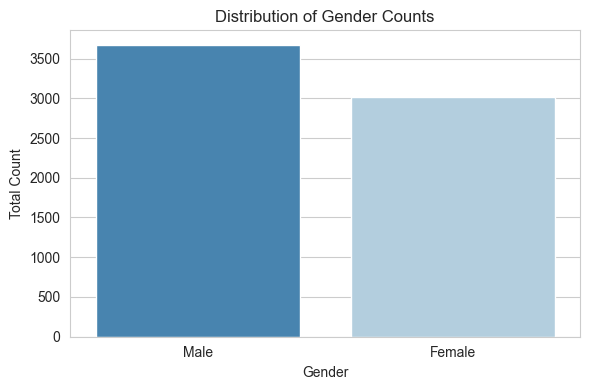

In [11]:
# Choose a Seaborn color palette
color_palette = 'Blues_r'

# Set Seaborn style
sns.set_style('whitegrid')

# Create a vertical bar plot with the chosen color palette
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=color_palette)
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.title('Distribution of Gender Counts')
plt.tight_layout()
plt.show()


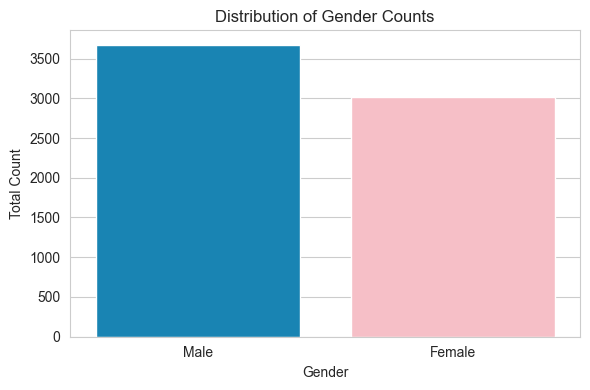

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn color palette selection - pastel tones of blue and pink
color_palette = ['#008ECC', '#FFB6C1']

# Set Seaborn style
sns.set_style('whitegrid')

# Create a vertical bar plot using the chosen color palette
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=color_palette)
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.title('Distribution of Gender Counts')
plt.tight_layout()
plt.show()



In [19]:
# Calculate the total count of each education level
education_counts = df['Education Level'].value_counts()
education_counts

Education Level
Bachelor's Degree    2265
Master's Degree      1570
PhD                  1368
Bachelor's            756
High School           436
Master's              288
phD                     1
Name: count, dtype: int64

In [20]:
#Education Level string replacement
df['Education Level'].replace("Bachelor's Degree", "Bachelor's", inplace=True)
df['Education Level'].replace("Master's Degree", "Master's", inplace=True)
df['Education Level'].replace("phD", "PhD", inplace=True)


In [21]:
# Calculate the total count of each education level
education_counts = df['Education Level'].value_counts()
education_counts

Education Level
Bachelor's     3021
Master's       1858
PhD            1369
High School     436
Name: count, dtype: int64

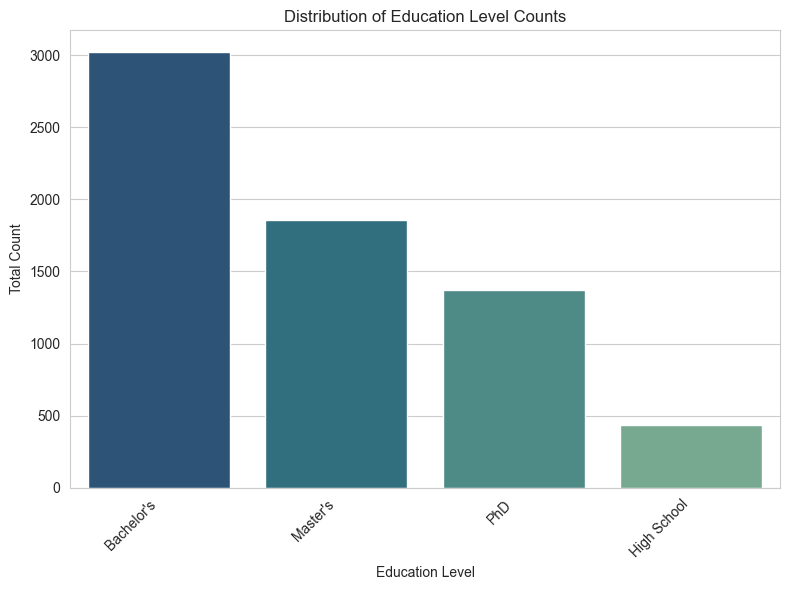

In [32]:
# Choose a Seaborn color palette
color_palette = 'crest_r'

# Set Seaborn style
sns.set_style('whitegrid')

# Create a vertical bar plot with the chosen color palette
plt.figure(figsize=(8, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette=color_palette)
plt.xlabel('Education Level')
plt.ylabel('Total Count')
plt.title('Distribution of Education Level Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [33]:
# Checking for duplicates 
duplicates = df.duplicated()
print("Number of duplicates:", duplicates.sum())

# Removing duplicated rows
df.drop_duplicates(inplace=True)

Number of duplicates: 4905


In [34]:
len(df)

1779

In [35]:
import pandas as pd
import numpy as np
from scipy import stats

# Function to detect outliers using Z-score
def detect_outliers_zscore(dataframe, threshold=3):
    df_copy = dataframe.copy()  # Create a copy of the DataFrame to avoid modifying the original data
    # Loop through all numerical columns in the DataFrame
    for col in df_copy.select_dtypes(include=[np.number]).columns:
        # Calculate the Z-score for each data point in the column
        z_scores = np.abs(stats.zscore(df_copy[col]))
        # Create a boolean mask for outliers
        outliers_mask = z_scores > threshold
        # Add a new column to the DataFrame to identify outliers
        df_copy[f'{col}_outlier'] = outliers_mask
        # Add a new column to the DataFrame to store the Z-scores
        df_copy[f'{col}_zscore'] = z_scores
    return df_copy
    
# Call the function to detect outliers using Z-score
df_with_outliers = detect_outliers_zscore(df)


In [36]:
# Filter the DataFrame to show only rows with outliers for 'Age' column
outlier_rows_age = df_with_outliers[df_with_outliers['Age_outlier']]

# Select only 'Age' and 'Age_outlier' columns
age_outlier_subset = outlier_rows_age[['Age', 'Age_zscore', 'Age_outlier']]

# Drop duplicate outlier rows to show only unique outliers
unique_outlier_rows_age = age_outlier_subset.drop_duplicates()

# Display the DataFrame with only unique rows containing outliers for 'Age' column
print(unique_outlier_rows_age)


       Age  Age_zscore  Age_outlier
1211  61.0    3.161673         True
1225  62.0    3.283863         True
1260  60.0    3.039484         True


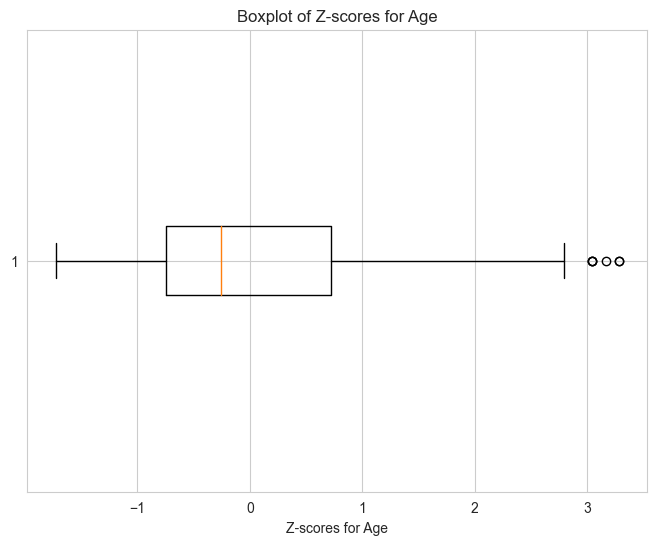

In [37]:
# Function to calculate Z-scores for the entire 'Age' column
def calculate_zscores(dataframe):
    z_scores = stats.zscore(dataframe['Age'])
    return z_scores

# Assuming 'df' is your DataFrame
# Calculate Z-scores for 'Age' column
df['Age_Z-score'] = calculate_zscores(df)

# Create a boxplot to visualize Z-scores for 'Age'
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age_Z-score'], vert=False)
plt.xlabel('Z-scores for Age')
plt.title('Boxplot of Z-scores for Age')
plt.show()

In [38]:
# Filter the DataFrame to show only rows with outliers for 'Age' column
outlier_rows_years_of_exp = df_with_outliers[df_with_outliers['Years of Experience_outlier']]

# Select only 'Age' and 'Age_outlier' columns
years_of_exp_outlier_subset = outlier_rows_years_of_exp[['Years of Experience','Years of Experience_zscore' ,'Years of Experience_outlier']]

# Drop duplicate outlier rows to show only unique outliers
unique_outlier_rows_years_of_exp = years_of_exp_outlier_subset.drop_duplicates()

# Display the DataFrame with only unique rows containing outliers for 'Age' column
print(unique_outlier_rows_years_of_exp)

      Years of Experience  Years of Experience_zscore  \
2387                 30.0                     3.06908   
2396                 33.0                     3.51026   
2421                 34.0                     3.65732   
2574                 31.0                     3.21614   
2820                 32.0                     3.36320   

      Years of Experience_outlier  
2387                         True  
2396                         True  
2421                         True  
2574                         True  
2820                         True  


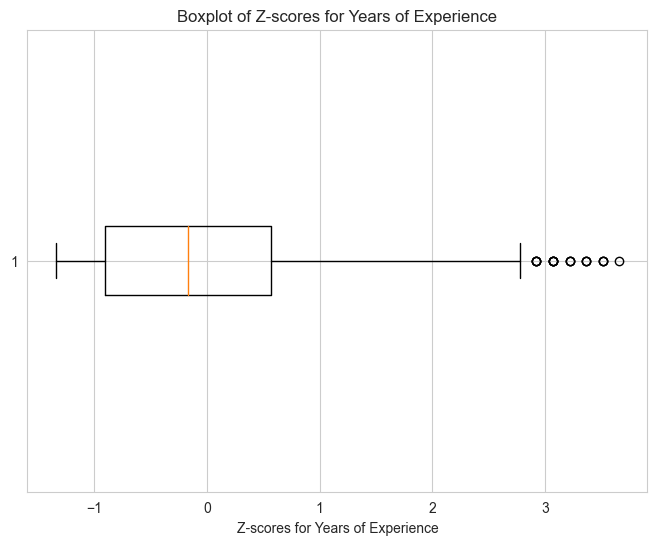

In [39]:
# Function to calculate Z-scores for the entire 'Age' column
def calculate_zscores(dataframe):
    z_scores = stats.zscore(dataframe['Years of Experience'])
    return z_scores

# Assuming 'df' is your DataFrame
# Calculate Z-scores for 'Age' column
df['Years of Experience_Z-score'] = calculate_zscores(df)

# Create a boxplot to visualize Z-scores for 'Age'
plt.figure(figsize=(8, 6))
plt.boxplot(df['Years of Experience_Z-score'], vert=False)
plt.xlabel('Z-scores for Years of Experience')
plt.title('Boxplot of Z-scores for Years of Experience')
plt.show()

In [40]:
# Filter the DataFrame to show only rows with outliers for 'Age' column
outlier_rows_salary = df_with_outliers[df_with_outliers['Salary_outlier']]

# Select only 'Age' and 'Age_outlier' columns
salary_outlier_subset = outlier_rows_salary[['Salary', 'Salary_zscore' ,'Salary_outlier']]

# Drop duplicate outlier rows to show only unique outliers
unique_outlier_rows_salary = salary_outlier_subset.drop_duplicates()

# Display the DataFrame with only unique rows containing outliers for 'Age' column
print(unique_outlier_rows_salary)


Empty DataFrame
Columns: [Salary, Salary_zscore, Salary_outlier]
Index: []


In [41]:
# Function to detect outliers using Z-scores and drop the outlier rows
def drop_outliers_zscore(dataframe, threshold=3):
    df_copy = dataframe.copy()
    for col in df_copy.select_dtypes(include=[np.number]).columns:
        z_scores = np.abs(stats.zscore(df_copy[col]))
        outliers_mask = z_scores > threshold
        df_copy = df_copy.loc[~outliers_mask]
    return df_copy

# Apply the function to drop rows containing outliers based on Z-scores
df_without_outliers = drop_outliers_zscore(df)
df_without_outliers = df_without_outliers[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']]


# Display the DataFrame without outlier rows
print(df_without_outliers)

       Age  Gender Education Level                  Job Title  \
0     32.0    Male      Bachelor's          Software Engineer   
1     28.0  Female        Master's               Data Analyst   
2     45.0    Male             PhD             Senior Manager   
3     36.0  Female      Bachelor's            Sales Associate   
4     52.0    Male        Master's                   Director   
...    ...     ...             ...                        ...   
6623  43.0  Female        Master's  Digital Marketing Manager   
6624  27.0    Male     High School              Sales Manager   
6625  33.0  Female      Bachelor's      Director of Marketing   
6628  37.0    Male      Bachelor's             Sales Director   
6631  30.0  Female      Bachelor's              Sales Manager   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3                     7.0   60000.0  
4                    20.0  20

In [42]:
# Select the columns for which you want to create the correlation matrix
selected_columns = ['Age', 'Years of Experience', 'Salary']

# Create a new DataFrame containing only the selected columns
selected_df = df_without_outliers[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Print the correlation matrix
print(correlation_matrix)


                          Age  Years of Experience    Salary
Age                  1.000000             0.936150  0.763066
Years of Experience  0.936150             1.000000  0.826882
Salary               0.763066             0.826882  1.000000


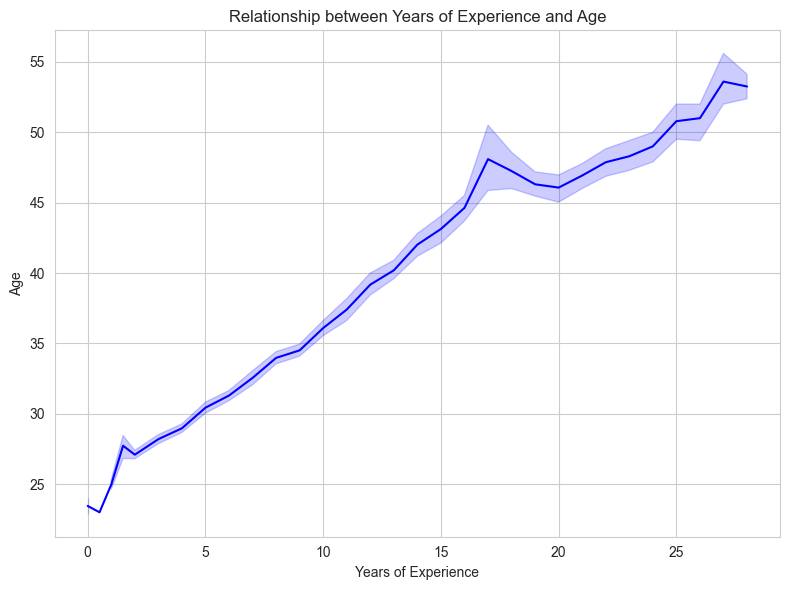

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot to visualize the relationship between 'Age' and 'Years of Experience'
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_without_outliers, x='Years of Experience', y='Age', color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Age')
plt.title('Relationship between Years of Experience and Age')
plt.tight_layout()
plt.show()




In [47]:
# Drop the 'Age' column
df_without_outliers.drop('Age', axis=1, inplace=True)

# Display the DataFrame without the 'Age' column
print(df_without_outliers)

      Gender Education Level                  Job Title  Years of Experience  \
0       Male      Bachelor's          Software Engineer                  5.0   
1     Female        Master's               Data Analyst                  3.0   
2       Male             PhD             Senior Manager                 15.0   
3     Female      Bachelor's            Sales Associate                  7.0   
4       Male        Master's                   Director                 20.0   
...      ...             ...                        ...                  ...   
6623  Female        Master's  Digital Marketing Manager                 15.0   
6624    Male     High School              Sales Manager                  2.0   
6625  Female      Bachelor's      Director of Marketing                  8.0   
6628    Male      Bachelor's             Sales Director                  7.0   
6631  Female      Bachelor's              Sales Manager                  5.0   

        Salary  
0      90000.0  
1    

In [48]:
df_without_outliers=df_without_outliers.reset_index(drop=True)

In [49]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Apply one-hot encoding to the 'Gender' column
gender_encoded = onehot_encoder.fit_transform(df_without_outliers[['Gender']])

# Create a DataFrame with the one-hot encoded features and appropriate column names
df_encoded_gender = pd.DataFrame(gender_encoded, columns=onehot_encoder.get_feature_names_out())

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df_without_outliers, df_encoded_gender], axis=1)

# Display the DataFrame with one-hot encoded 'Gender' column
print(df_encoded)

      Gender Education Level                  Job Title  Years of Experience  \
0       Male      Bachelor's          Software Engineer                  5.0   
1     Female        Master's               Data Analyst                  3.0   
2       Male             PhD             Senior Manager                 15.0   
3     Female      Bachelor's            Sales Associate                  7.0   
4       Male        Master's                   Director                 20.0   
...      ...             ...                        ...                  ...   
1751  Female        Master's  Digital Marketing Manager                 15.0   
1752    Male     High School              Sales Manager                  2.0   
1753  Female      Bachelor's      Director of Marketing                  8.0   
1754    Male      Bachelor's             Sales Director                  7.0   
1755  Female      Bachelor's              Sales Manager                  5.0   

        Salary  Gender_Male  
0      90

In [50]:
# Use ordinal encoder for Education Level
from sklearn.preprocessing import OrdinalEncoder

# Define the order of ordinal categories (adjust the order as per your data)
education_order = ['High School', "Bachelor's", "Master's", 'PhD']

# Create an instance of the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Apply the ordinal encoding to the 'Education Level' column
df_encoded['Education Level Encoded'] = ordinal_encoder.fit_transform(df_encoded[['Education Level']])

# Display the DataFrame with the new 'Education Level Encoded' column
df_encoded.tail(10)

,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Male,Education Level Encoded
1746,Male,Master's,Marketing Manager,14.0,140000.0,1.0,2.0
1747,Female,High School,Sales Executive,1.0,35000.0,0.0,0.0
1748,Male,Bachelor's,Content Marketing Manager,13.0,130000.0,1.0,1.0
1749,Female,PhD,Senior Product Marketing Manager,10.0,100000.0,0.0,3.0
1750,Male,Bachelor's,Sales Representative,1.0,35000.0,1.0,1.0
1751,Female,Master's,Digital Marketing Manager,15.0,150000.0,0.0,2.0
1752,Male,High School,Sales Manager,2.0,40000.0,1.0,0.0
1753,Female,Bachelor's,Director of Marketing,8.0,80000.0,0.0,1.0
1754,Male,Bachelor's,Sales Director,7.0,90000.0,1.0,1.0
1755,Female,Bachelor's,Sales Manager,5.0,70000.0,0.0,1.0


In [51]:
# Define keywords for each level
junior_keywords = ['Junior', 'Juniour', 'Entry-Level', 'Associate', 'Coordinator', 'Assistant', 'Training', 'Clerk', 'Representative', 'Rep']
senior_keywords = ['Senior', 'Experienced']
manager_keywords = ['Manager','Man']
director_keywords = ['Director', 'VP']
ceo_keywords = ['CEO', 'Chief']


# Function to categorize the job titles
def categorize_job_level(job_title):
    job_title_lower = job_title.lower()
    
    if any(keyword.lower().strip() in job_title_lower for keyword in junior_keywords):
        return 'Junior'
    elif any(keyword.lower().strip() in job_title_lower for keyword in senior_keywords):
        if 'senior manager' in job_title_lower:
            return 'Manager'
        else:
            return 'Senior'
    elif any(keyword.lower().strip() in job_title_lower for keyword in manager_keywords):
        return 'Manager'
    elif any(keyword.lower().strip() in job_title_lower for keyword in director_keywords):
        return 'Director'
    elif any(keyword.lower().strip() in job_title_lower for keyword in ceo_keywords):
        return 'CEO'
    else:
        return 'SME'

# Define keywords for each department
it_keywords = ['IT', 'Technical','Technology', 'Engineer', 'Developer', 'Software', 'Web', 'Network', 'Support', 'Programmer', 'Data','Customer Success', 'Product']
hr_keywords = ['HR', 'Human Resources', 'Recruiter']
finance_keywords = ['Finance', 'Financial', 'Accountant']
marketing_keywords = ['Marketing', 'Social Media', 'Digital Marketing', 'Copywriter', 'Advertising', 'Event']
operations_keywords = ['Operations']
sales_keywords = ['Sales', 'Account', 'Public Relations','Business Development', 'Account Manager', 'Representative', 'Rep']
design_keywords = ['Designer', 'UX', 'Graphic', 'Creative', 'Product Designer', 'Digital Content']
research_keywords = ['Research', 'Scientist', 'Analyst']

# Function to categorize the job titles into departments
def categorize_department(job_title):
    job_title_lower = job_title.lower()
    
    if any(keyword.lower().strip() in job_title_lower for keyword in hr_keywords):
        return 'HR'
    elif any(keyword.lower().strip() in job_title_lower for keyword in finance_keywords):
        return 'Finance'
    elif any(keyword.lower().strip() in job_title_lower for keyword in operations_keywords):
        return 'Operations'
    elif any(keyword.lower().strip() in job_title_lower for keyword in sales_keywords):
        return 'Sales'
    elif any(keyword.lower().strip() in job_title_lower for keyword in design_keywords):
        return 'Design'
    elif any(keyword.lower().strip() in job_title_lower for keyword in marketing_keywords):
        return 'Marketing'
    elif any(keyword.lower().strip() in job_title_lower for keyword in it_keywords):
        return 'IT'
    elif any(keyword.lower().strip() in job_title_lower for keyword in research_keywords):
        return 'Research'
    else:
        return 'General'

# Apply the department categorization function to create a new column 'Department'
df_encoded['Department'] = df_encoded['Job Title'].apply(categorize_department)
df_encoded['Level'] = df_encoded['Job Title'].apply(categorize_job_level)
# Print the updated DataFrame
print(df_encoded)


      Gender Education Level                  Job Title  Years of Experience  \
0       Male      Bachelor's          Software Engineer                  5.0   
1     Female        Master's               Data Analyst                  3.0   
2       Male             PhD             Senior Manager                 15.0   
3     Female      Bachelor's            Sales Associate                  7.0   
4       Male        Master's                   Director                 20.0   
...      ...             ...                        ...                  ...   
1751  Female        Master's  Digital Marketing Manager                 15.0   
1752    Male     High School              Sales Manager                  2.0   
1753  Female      Bachelor's      Director of Marketing                  8.0   
1754    Male      Bachelor's             Sales Director                  7.0   
1755  Female      Bachelor's              Sales Manager                  5.0   

        Salary  Gender_Male  Education 

In [52]:
df_encoded.head()

,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Male,Education Level Encoded,Department,Level
0,Male,Bachelor's,Software Engineer,5.0,90000.0,1.0,1.0,IT,SME
1,Female,Master's,Data Analyst,3.0,65000.0,0.0,2.0,IT,SME
2,Male,PhD,Senior Manager,15.0,150000.0,1.0,3.0,General,Manager
3,Female,Bachelor's,Sales Associate,7.0,60000.0,0.0,1.0,Sales,Junior
4,Male,Master's,Director,20.0,200000.0,1.0,2.0,General,Director


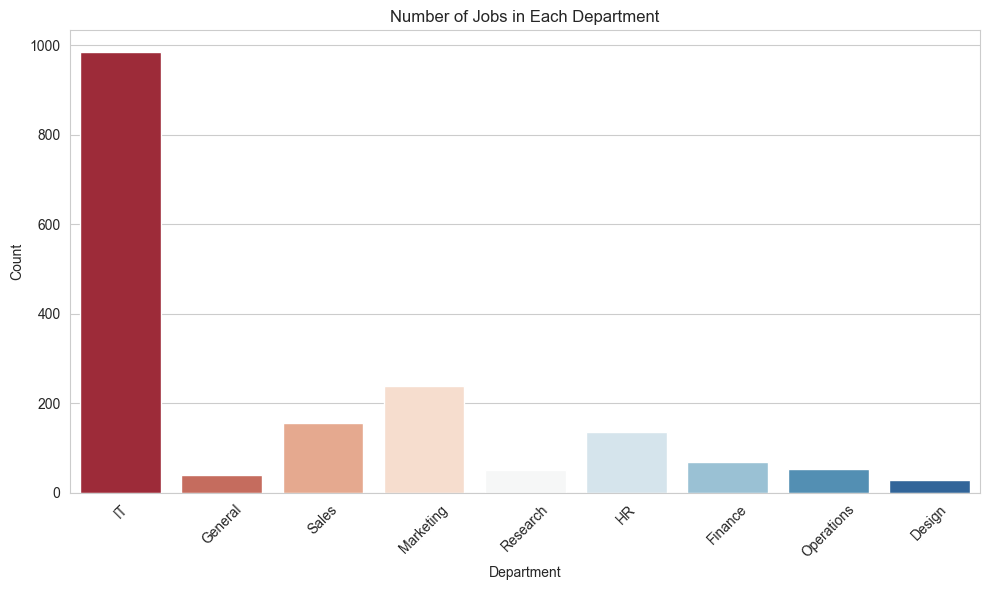

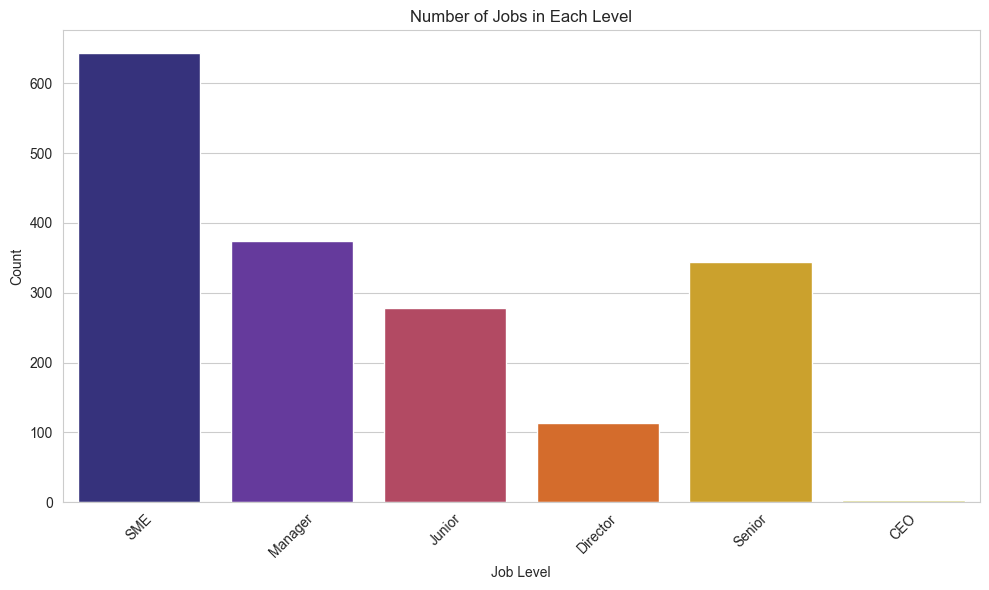

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose a Seaborn color palette
color_palette = 'RdBu'  # Example: using the 'Blues_r' palette

# Set Seaborn style
sns.set_style('whitegrid')

# Create a bar plot for 'Department' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', data=df_encoded, palette=color_palette)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Number of Jobs in Each Department')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

color_palette2 = 'CMRmap'  # Example: using the 'Blues_r' palette

# Create a bar plot for 'Level' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Level', data=df_encoded, palette=color_palette2)
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.title('Number of Jobs in Each Level')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [54]:
df_encoded['Department'].value_counts()

Department
IT            984
Marketing     239
Sales         156
HR            137
Finance        68
Operations     54
Research       50
General        39
Design         29
Name: count, dtype: int64

In [55]:
df_encoded['Level'].value_counts()

Level
SME         644
Manager     374
Senior      344
Junior      278
Director    113
CEO           3
Name: count, dtype: int64

In [56]:
# Create a new column by concatenating 'Department' and 'Level' columns
df_encoded['Department_Level'] = df_encoded['Department'] + '-' + df_encoded['Level']

# Head the updated DataFrame with the new column
df_encoded.head()


,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Male,Education Level Encoded,Department,Level,Department_Level
0,Male,Bachelor's,Software Engineer,5.0,90000.0,1.0,1.0,IT,SME,IT-SME
1,Female,Master's,Data Analyst,3.0,65000.0,0.0,2.0,IT,SME,IT-SME
2,Male,PhD,Senior Manager,15.0,150000.0,1.0,3.0,General,Manager,General-Manager
3,Female,Bachelor's,Sales Associate,7.0,60000.0,0.0,1.0,Sales,Junior,Sales-Junior
4,Male,Master's,Director,20.0,200000.0,1.0,2.0,General,Director,General-Director


In [57]:
df_encoded['Department_Level'].value_counts()

Department_Level
IT-SME                 544
IT-Senior              218
IT-Manager             170
Marketing-Manager       99
Sales-Junior            91
Marketing-Junior        54
HR-Junior               52
IT-Junior               41
HR-Senior               36
Marketing-Senior        33
Marketing-Director      33
Finance-Manager         28
HR-Director             27
Sales-Manager           23
Operations-Manager      23
Marketing-SME           20
Research-SME            20
Design-SME              19
Sales-Director          18
HR-Manager              17
Sales-SME               16
Research-Senior         15
General-Manager         14
Finance-SME             14
Finance-Senior          13
Operations-Junior       12
Operations-Director     11
Research-Director       10
General-Junior          10
Finance-Junior          10
IT-Director              9
General-Senior           8
Sales-Senior             8
Operations-Senior        7
Design-Senior            6
General-SME              5
HR-SME     

In [58]:
# Calculate mean salary for each department level
mean_salary_by_department = df_encoded.groupby('Department_Level')['Salary'].mean()

# Map the mean salary values back to the original dataframe
df_encoded['Department_Level_Target_Encoded'] = df_encoded['Department_Level'].map(mean_salary_by_department)


In [59]:
df_encoded.head()

,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Male,Education Level Encoded,Department,Level,Department_Level,Department_Level_Target_Encoded
0,Male,Bachelor's,Software Engineer,5.0,90000.0,1.0,1.0,IT,SME,IT-SME,113559.920956
1,Female,Master's,Data Analyst,3.0,65000.0,0.0,2.0,IT,SME,IT-SME,113559.920956
2,Male,PhD,Senior Manager,15.0,150000.0,1.0,3.0,General,Manager,General-Manager,115714.285714
3,Female,Bachelor's,Sales Associate,7.0,60000.0,0.0,1.0,Sales,Junior,Sales-Junior,39692.307692
4,Male,Master's,Director,20.0,200000.0,1.0,2.0,General,Director,General-Director,200000.000000


In [60]:
df_encoded.columns

Index(['Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Gender_Male', 'Education Level Encoded', 'Department',
       'Level', 'Department_Level', 'Department_Level_Target_Encoded'],
      dtype='object')

In [61]:
from sklearn.model_selection import train_test_split

y = df_encoded.Salary
X = df_encoded[['Years of Experience', 'Gender_Male', 'Education Level Encoded', 'Department_Level_Target_Encoded']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

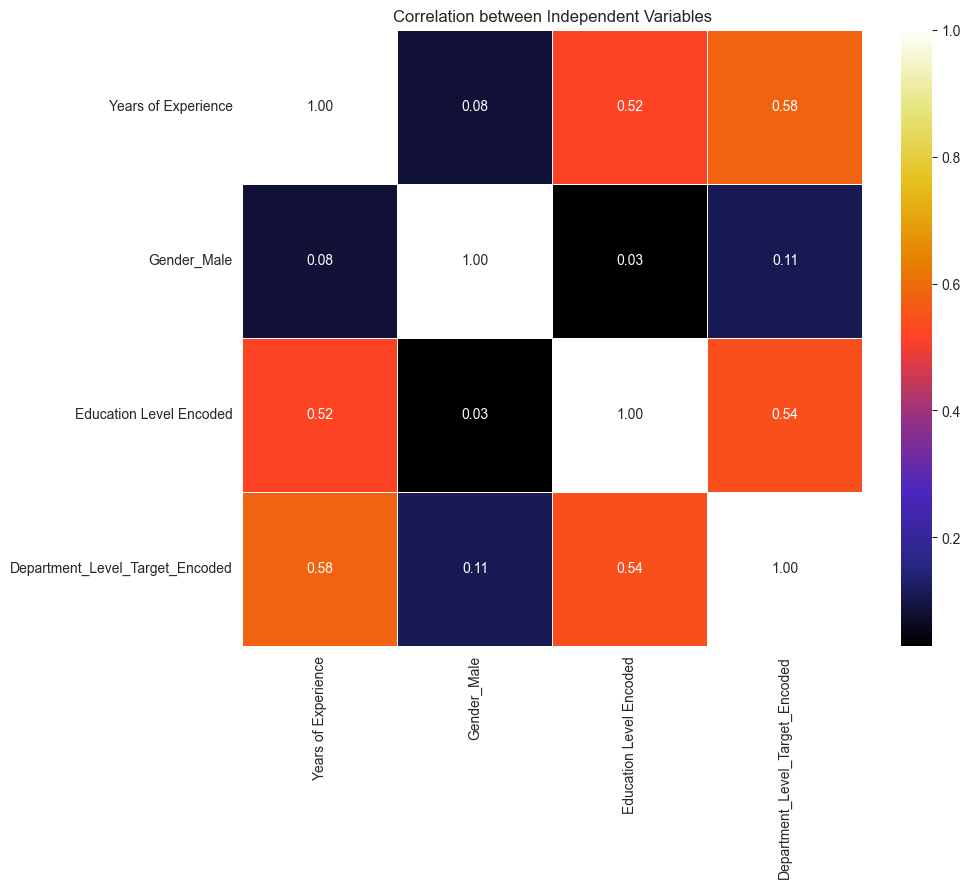

In [62]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='CMRmap', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Independent Variables")
plt.show()

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant column to the DataFrame (required for VIF calculation)
X_with_const = add_constant(X_train)

# Calculate VIF for each independent variable
vif_values = pd.DataFrame()
vif_values["Variable"] = X_with_const.columns
vif_values["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF values
print(vif_values)


                          Variable        VIF
0                            const  11.774457
1              Years of Experience   1.685389
2                      Gender_Male   1.010313
3          Education Level Encoded   1.568552
4  Department_Level_Target_Encoded   1.728598


In [64]:
# Calculate the correlation between each feature and the target variable
correlation_with_target = X.corrwith(y)

# Print the correlation results
print(correlation_with_target)

Years of Experience                0.826882
Gender_Male                        0.110262
Education Level Encoded            0.608799
Department_Level_Target_Encoded    0.720228
dtype: float64


In [65]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Predict on testing data
prediction = lin_reg.predict(X_test)

In [1]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluation(y, predictions):
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse) 
    r_squared = r2_score(y, predictions)
    return mse, rmse, r_squared

In [68]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
prediction = lin_reg.predict(X_test)

mae,r_squared = evaluation(y_test, prediction)

print("MAE:", mae)
print("R2 Score:", r_squared)

new_row = {"Model": "LinearRegression","MAE": mae , "R2 Score": r_squared}


MAE: 18455.538184492507
R2 Score: 0.7800327688973729


In [69]:
import statsmodels.api as sm

# Add a constant term to the predictors (X) for the intercept
X_with_intercept = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
model = sm.OLS(y_train, X_with_intercept)
results = model.fit()

# Display the summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1116.
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:47:23   Log-Likelihood:                -14107.
No. Observations:                1229   AIC:                         2.822e+04
Df Residuals:                    1224   BIC:                         2.825e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [548]:
import pickle

# 'lin_reg' is the trained LinearRegression model
model_filename = 'linear_regression_model.pkl'

# Save the trained model to a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(lin_reg, file)

print("Trained model saved as a pickle file:", model_filename)


Trained model saved as a pickle file: linear_regression_model.pkl


In [549]:
# Generate random values for the independent variables
num_samples = 5  # Number of new data points to simulate
random_years_of_experience = np.random.randint(1, 30, num_samples)  # Random integers between 1 and 30
random_gender_male = np.random.randint(0, 2, num_samples)  # Random 0 or 1
random_education_level_encoded = np.random.randint(0, 4, num_samples)  # Random integers between 0 and 3
random_department_level_target_encoded = np.random.randint(0, 250000, num_samples)  # Random integers between 0 and 250000

# Create a DataFrame with the random IVs
random_ivs_df = pd.DataFrame({
    'Years of Experience': random_years_of_experience,
    'Gender_Male': random_gender_male,
    'Education Level Encoded': random_education_level_encoded,
    'Department_Level_Target_Encoded': random_department_level_target_encoded
})

In [550]:
random_ivs_df.head()

,Years of Experience,Gender_Male,Education Level Encoded,Department_Level_Target_Encoded
0,10,1,3,11394
1,28,1,2,69092
2,28,0,3,3890
3,16,1,3,41606
4,15,0,0,227348


In [551]:
# Load the trained model from the pickle file
model_filename = 'linear_regression_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to predict the target variable (Salary) based on the random IVs
predictions = loaded_model.predict(random_ivs_df)

# Create a DataFrame with the random IVs and the predictions
result_df = random_ivs_df.copy()
result_df['Predicted Salary'] = predictions

# Display the result DataFrame
result_df.head()


,Years of Experience,Gender_Male,Education Level Encoded,Department_Level_Target_Encoded,Predicted Salary
0,10,1,3,11394,84816.534695
1,28,1,2,69092,183540.427597
2,28,0,3,3890,159288.683203
3,16,1,3,41606,125101.189650
4,15,0,0,227348,175599.386612
